


<center><h1><u>Ejemplos Modelos de Machine Learning</u></h1>

# Predicción de la probabilidad de supervivencia de los pasajeros del Titanic

## 1. Definición del problema

Este ejercicio tiene como objetivo precedir la probabilidad de supervivencia de un pasajero en el Titanic basado en ciertas características de cada persona

## 2. Recopilación y carga de datos

El dataset `titanic.csv` contiene información de los pasajeros del Titanic y sus características de acuerdo al siguiente detalle:

   - **PassengerId (Identificación del pasajero)**: Identificador único para cada pasajero.  
   - **Survived (Sobreviviente)**: Indica si el pasajero sobrevivió o no al naufragio. 1 = Sobrevivió, 0 = No sobrevivió.
   - **Pclass (Clase)**: Clase del pasajero en el barco. 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.
   - **Name (Nombre)**: Nombre del pasajero.
   - **Sex (Sexo)**: Género del pasajero.
   - **Age (Edad)**: Edad del pasajero en años.
   - **SibSp (Hermanos/Cónyuges a bordo)**: Número de hermanos o cónyuges que el pasajero tenía a bordo.
   - **Parch (Padres/Hijos a bordo)**: Número de padres o hijos que el pasajero tenía a bordo.
   - **Ticket (Boleto)**: Número del boleto del pasajero.
   - **Fare (Tarifa)**: Tarifa pagada por el pasajero.
   - **Cabin (Cabina)**: Número de la cabina del pasajero.
   - **Embarked (Puerto de embarque)**: Puerto donde el pasajero embarcó. C = Cherbourg, Q = Queenstown, S = Southampton.

**Cargar las librerías para el análisis de datos**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar el dataset**

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Verificar las características del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cambiar nombre de las columnas



## 3. Análisis exploratorio de datos (EDA) y limpieza de datos

**Eliminar columnas**


Eliminar la columna Cabin, Ticket y Name que no es relevante para el análisis

In [4]:
df.drop(columns=['PassengerId','Cabin','Ticket','Name'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Revisar valores nulos


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Hay que completar los valores nulos con un valor

Actualizar los valores nulos de la columna `Age` para las mujeres, usando el valor de la mediana de edad de todas las pasajeras mujeres

In [7]:
# Filtrar filas para las mujeres
mask_female = df['Sex'] == 'female'
# Calcular la mediana de la edad de las mujeres
f_median = df.loc[mask_female,'Age'].median()
f_median

27.0

In [8]:
# Reemplazar los valores nulos (mujeres)
df.loc[mask_female,'Age'] = df.loc[mask_female,'Age'].fillna(f_median)

In [9]:
#Comprobamos los valores nulos
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         124
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Actualizar los valores nulos de la columna `Age` para los hombres, usando el valor de la mediana de edad de todos los pasajeros hombres

In [10]:
# Filtrar hombres
mask_male = df['Sex'] == 'male'
# Calcular la mediana de la edad de los hombres
m_median = df.loc[mask_male,'Age'].median()
m_median

29.0

In [11]:
# Reemplazar los valores nulos (hombres)
df.loc[mask_male,'Age'] = df.loc[mask_male,'Age'].fillna(m_median)

In [12]:
#Comprobamos los valores nulos
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Rellenar el valor faltante en la columna de `Embarked` con el valor más común (el valor que más se repite en esta columna)

In [13]:
common_embarked = df['Embarked'].value_counts().head(1).index[0]
common_embarked

'S'

In [14]:
df['Embarked'].fillna(common_embarked, inplace=True)

In [15]:
#Comprobamos los valores nulos
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Se puede observar que ya no existen valores nulos en el Data Frame

#### Creación de nuevas columnas

Es necesario crear una nueva columna para saber si los pasajeros viajaban solos o acompañados

In [16]:
df['is_alone']=df['Parch']+df['SibSp']

In [17]:
def is_alone(valor):
    if valor == 0:
        return 'Yes'
    else:
        return 'No'

In [18]:
df['is_alone']=df['is_alone'].apply(is_alone)

In [19]:
df['is_alone'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: is_alone, dtype: object

Eliminar la columnas Parch y SibSp

In [20]:
df.drop(columns=['Parch','SibSp'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   is_alone  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


Transformar las columnas Survived y Pclass a tipo objeto ya que representan una categoría

In [22]:
df['Survived'] = df['Survived'].astype('object')
df['Pclass'] = df['Pclass'].astype('object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   is_alone  891 non-null    object 
dtypes: float64(2), object(5)
memory usage: 48.9+ KB


### 3.1 Análisis univariado

In [24]:
#Obtengo las columnas numéricas y categóricas
columnas_numericas = set(df.describe().columns)
columnas_categoricas = set(df.columns)-columnas_numericas
columnas_categoricas = list(columnas_categoricas)
columnas_numericas = list(columnas_numericas)

In [25]:
print("Las columnas categóricas son:", columnas_categoricas)
print("Las columnas númericas son:", columnas_numericas)

Las columnas categóricas son: ['Survived', 'Sex', 'Embarked', 'is_alone', 'Pclass']
Las columnas númericas son: ['Fare', 'Age']


#### 3.1.1 Variables categóricas 

Obtener la distribución de las variables categóricas


In [26]:
#Obtengo la distribución de cada variable cualitativa
for columna in columnas_categoricas:
    valores = df[columna].value_counts()
    proporciones = df[columna].value_counts(normalize=True)*100
    resultado = pd.DataFrame({'Cantidad': valores, 'Porcentaje': proporciones})
    print("\n",columna.upper(),"\n",resultado)


 SURVIVED 
           Cantidad  Porcentaje
Survived                      
0              549   61.616162
1              342   38.383838

 SEX 
         Cantidad  Porcentaje
Sex                         
male         577   64.758698
female       314   35.241302

 EMBARKED 
           Cantidad  Porcentaje
Embarked                      
S              646   72.502806
C              168   18.855219
Q               77    8.641975

 IS_ALONE 
           Cantidad  Porcentaje
is_alone                      
Yes            537    60.26936
No             354    39.73064

 PCLASS 
         Cantidad  Porcentaje
Pclass                      
3            491   55.106622
1            216   24.242424
2            184   20.650954


#### Visualización de datos 

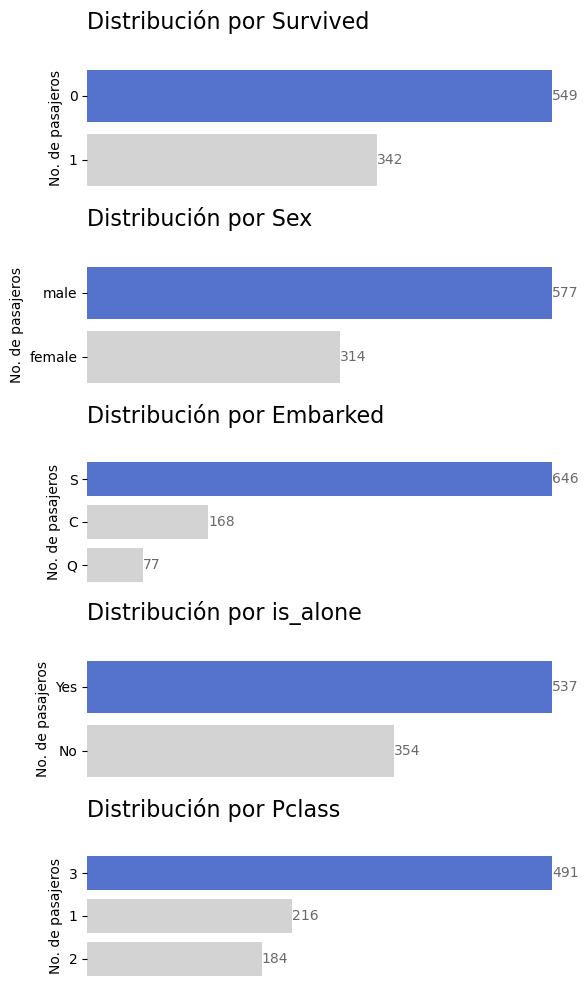

In [27]:
# Crear las figuras necesarias
fig, ax = plt.subplots(len(columnas_categoricas), 1, figsize=(6, 10))

for columna in columnas_categoricas:
    i=columnas_categoricas.index(columna)   
    # Obtener el orden de los valores más altos a más bajos
    orden = df[columna].value_counts().index
    graf = sns.countplot(df,y=columna,ax=ax[i],order=orden, palette=["royalblue",'lightgray','lightgray']
                        )
    # Quitar el borde del gráfico
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    # Quitar la marcas del eje x
    ax[i].tick_params(axis='x', which='both', length=0)
    ax[i].set_xticklabels([])
    # Nombres de los ejes
    ax[i].set_ylabel("No. de pasajeros",size=10)
    ax[i].set_xlabel("")
    # Título del gráfico
    ax[i].set_title("Distribución por "+ columna+'\n', size=16, loc='left')
    graf.bar_label(graf.containers[0], size=10, color='dimgray')
    
plt.tight_layout()
plt.show()

De las tablas y gráficos anteriores se puede observar que: 

- El 60% de los pasajeros viajaba solo
- La mayoría de pasajeros embarcaron en Southampton (el 72%)
- Se embarcaron 577 hombres y 314 mujeres (65% hombres)
- El 55% de los pasajeros viajaba en tercera clase
- Solo el 38% de los pasajeros sobrevivió.


#### 3.1.2 Variables numéricas

In [28]:
columnas_numericas

['Fare', 'Age']

Obtener las estadisticas descriptivas

In [29]:
df[columnas_numericas].describe()

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.441268
std,49.693429,13.018747
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,29.000000
75%,31.000000,35.000000
max,512.329200,80.000000


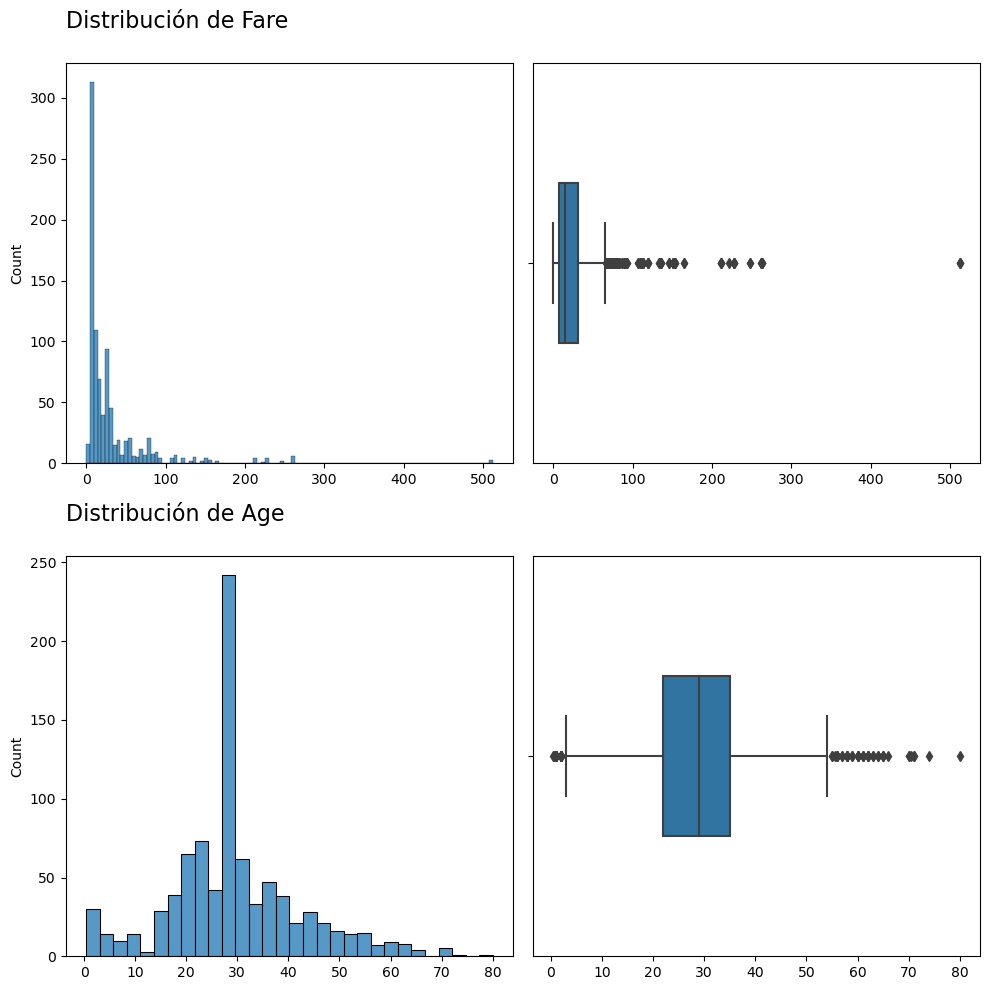

In [30]:
# Crear las figuras necesarias
fig, ax = plt.subplots(len(columnas_numericas), 2, figsize=(10, 10))

for columna in columnas_numericas:
    i=columnas_numericas.index(columna)
    #Histograma
    sns.histplot(data=df,x=columna, ax=ax[i][0], kde=False)
    #Boxplot
    sns.boxplot(data=df, x=columna, ax=ax[i][1], orient='h', width=0.4)       
    # Quitar titulo del eje x
    ax[i][0].set_xlabel("")
    ax[i][1].set_xlabel("")    
    # Título del gráfico
    ax[i][0].set_title("Distribución de "+ columna+'\n', size=16, loc='left')
    
    
plt.tight_layout()
plt.show()

En las estadísticas y gráficos anteriores podemos observar:
   - La mediana de la edad de los pasajeros es 29 años y el 75% de los pasajeros era menor de 35 años
   - La edad más alta es 80 años
   - El 75% de los pasajeros pago una tarifa de hasta 31 dólares
   - Existen valores extremos en estas dos variables 

### 3.2 Análisis bivariado

#### Distribución de pasajeros por género (Sex) y si sobrevivieron (Survived)

In [31]:
pt_sex_srv = df.pivot_table(columns='Sex', index='Survived', values='is_alone', aggfunc='count')
pt_sex_srv

Sex,female,male
Survived,,
0,81,468
1,233,109


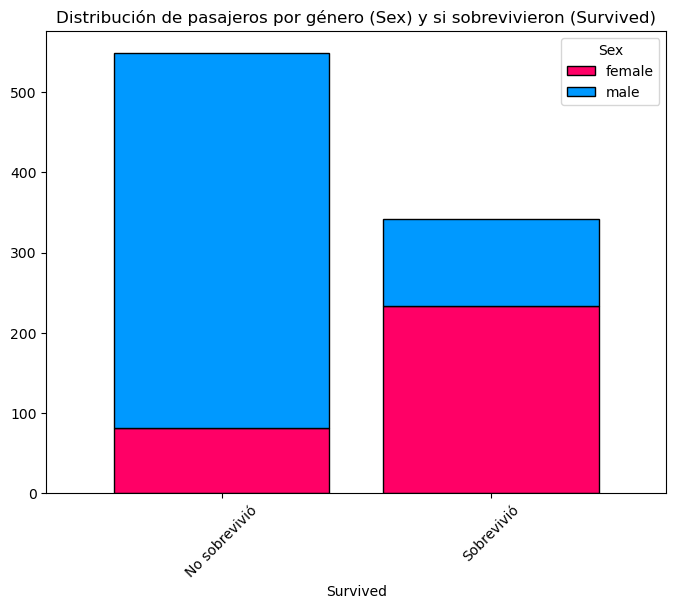

In [32]:
pt_sex_srv.plot.bar(width=0.8,
              color=('#FF0066','#0099FF'),
              edgecolor='black',
              figsize=(8,6),
              title='Distribución de pasajeros por género (Sex) y si sobrevivieron (Survived)',
              stacked=True
             )

plt.xticks([0,1], labels=["No sobrevivió", 'Sobrevivió'], rotation=45)
plt.show()

Se puede observar que la mayoría de los hombres no sobrevivió

#### Distribución de pasajeros por si viajaban solos (is_alone) y si sobrevivieron (Survived)

In [33]:
pt_alone_srv = df.pivot_table(columns='is_alone', index='Survived', values='Sex', aggfunc='count')
pt_alone_srv

is_alone,No,Yes
Survived,,
0,175,374
1,179,163


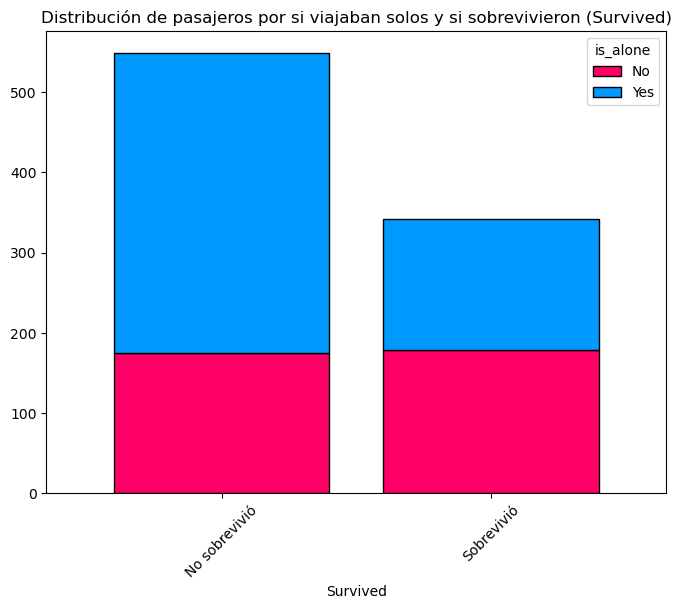

In [34]:
pt_alone_srv.plot.bar(width=0.8,
              color=('#FF0066','#0099FF'),
              edgecolor='black',
              figsize=(8,6),
              title='Distribución de pasajeros por si viajaban solos y si sobrevivieron (Survived)',
              stacked=True
             )

plt.xticks([0,1], labels=["No sobrevivió", 'Sobrevivió'], rotation=45)
plt.show()

La mayoría de los pasajeros que viajaban solos no sobrevivieron

#### Distribución de pasajeros por clase y si sobrevivieron (Survived)

In [35]:
pt_clase_srv = df.pivot_table(columns='Pclass', index='Survived', values='Sex', aggfunc='count')
pt_clase_srv

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


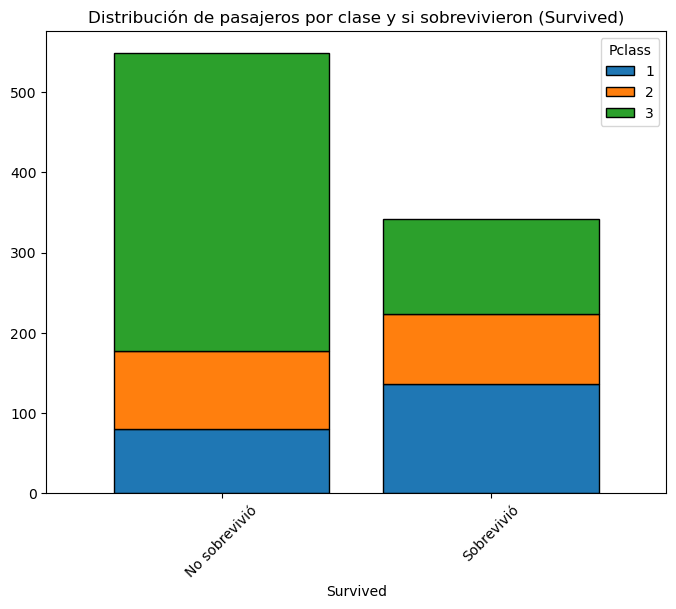

In [36]:
pt_clase_srv.plot.bar(width=0.8,
              edgecolor='black',
              figsize=(8,6),
              title='Distribución de pasajeros por clase y si sobrevivieron (Survived)',
              stacked=True
             )

plt.xticks([0,1], labels=["No sobrevivió", 'Sobrevivió'], rotation=45)
plt.show()

La mayoría de los pasajeros que no sobrevivieron pertenecían a la tercera clase

#### Distribución de la edad por sexo y por si sobrevivió

C:\Users\Andrea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


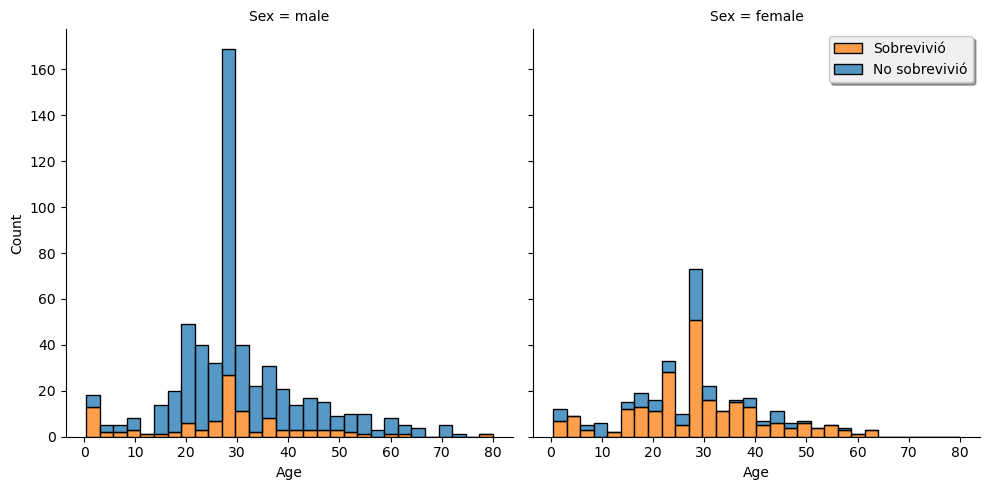

In [37]:
sns.displot(df, x='Age',
            hue='Survived',
            col='Sex',
            multiple='stack',
            legend=False)

plt.legend(loc='best',
           labels=["Sobrevivió", 'No sobrevivió'],
           shadow=True,
           framealpha=1,
           facecolor='0.94',
           title='')

plt.show()

## 3. Construir el modelo

### 3.1 Dividir los datos en conjuntos de entrenamiento y prueba

El conjunto de entrenamiento es utilizado para entrenar el modelo, mientras que el conjunto de prueba se utilizará para evaluar el modelo entrenado.

In [38]:
from sklearn.model_selection import train_test_split

# Separar las características con las que se entrena el modelo (X) y la variable objetivo (y) 
X = df.drop(['Survived','Embarked'], axis=1)  # Características
y = df['Survived']  # Variable objetivo

Transformar las columnas categóricas Sex y Embarked a númerica para trabajar en el modelo. Es decir a cada categoría le va a asignar un número.

In [39]:
from sklearn.preprocessing import LabelEncoder

# Crear el objeto LabelEncoder
encoder = LabelEncoder()

# Seleccionar las columnas a codificar
columnas_codificar = ['Sex',  'is_alone']

# Aplicar el LabelEncoder a las columnas seleccionadas
for col in columnas_codificar:
    X[col] = encoder.fit_transform(X[col])
    categorias = encoder.classes_
    valores_asignados = encoder.transform(categorias)
    print(categorias)
    print(valores_asignados)

['female' 'male']
[0 1]
['No' 'Yes']
[0 1]


Normalizar las columnas numéricas

In [40]:
# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Obtener el número de filas en el conjunto de entrenamiento y prueba
print("Filas en el conjunto de entrenamiento:",len(y_train))
print("Filas en el conjunto de prueba:",len(y_test))

Filas en el conjunto de entrenamiento: 712
Filas en el conjunto de prueba: 179


In [42]:
y_train = pd.DataFrame(y_train.astype('int32'))
y_test = pd.DataFrame(y_test.astype('int32'))

### 3.2 Construir el modelo predictivo (Decision Tree Classifier)

In [43]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train.values.ravel()) 
predictions = DTC.predict(X_test)   
  

### 3.2 Evaluar el modelo

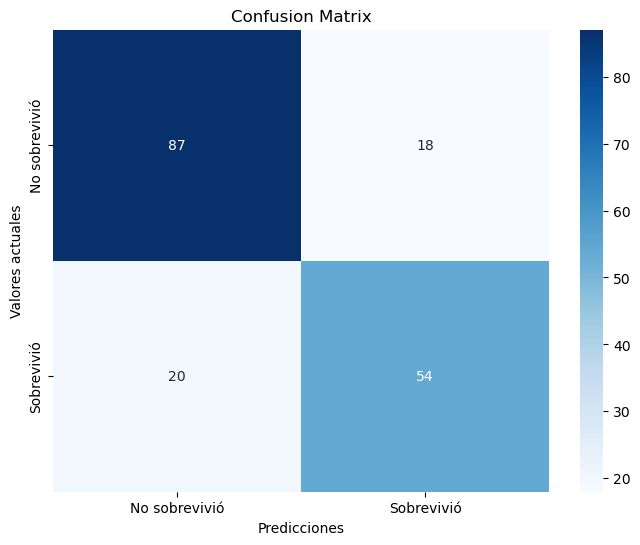

In [44]:
from sklearn.metrics import confusion_matrix
mc=confusion_matrix(y_test, predictions)

categorias = ['No sobrevivió','Sobrevivió' ]

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(mc, annot=True, cmap='Blues', xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicciones')
plt.ylabel('Valores actuales')
plt.title('Confusion Matrix')
plt.show()

In [49]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


 
print("Accuracy Index: El", round(accuracy_score(y_test, predictions)*100), "% del total de valores fueron clasificados correctamente por el modelo.")   
print("Recall index: El ",round(recall_score(y_test, predictions)*100), "% de los pasajeros que sobrevivieron fueron identificados correctamente")  
print("Precision index:",  precision_score(y_test, predictions)*100,"% de los pasajeros que sobrevivieron no fueron clasificados como falsos positivos")  
print("F1 score:", round(f1_score(y_test, predictions)*100), "%")  
 

Accuracy Index: El 79 % del total de valores fueron clasificados correctamente por el modelo.
Recall index: El  73 % de los pasajeros que sobrevivieron fueron identificados correctamente
Precision index: 75.0 % de los pasajeros que sobrevivieron no fueron clasificados como falsos positivos
F1 score: 74 %


De acuerdo al valor del F1 score se puede decir que el modelo está logrando una buena combinación de predecir correctamente tanto a los pasajeros que sobrevivieron como a los que no, aunque puede haber margen para mejorar.

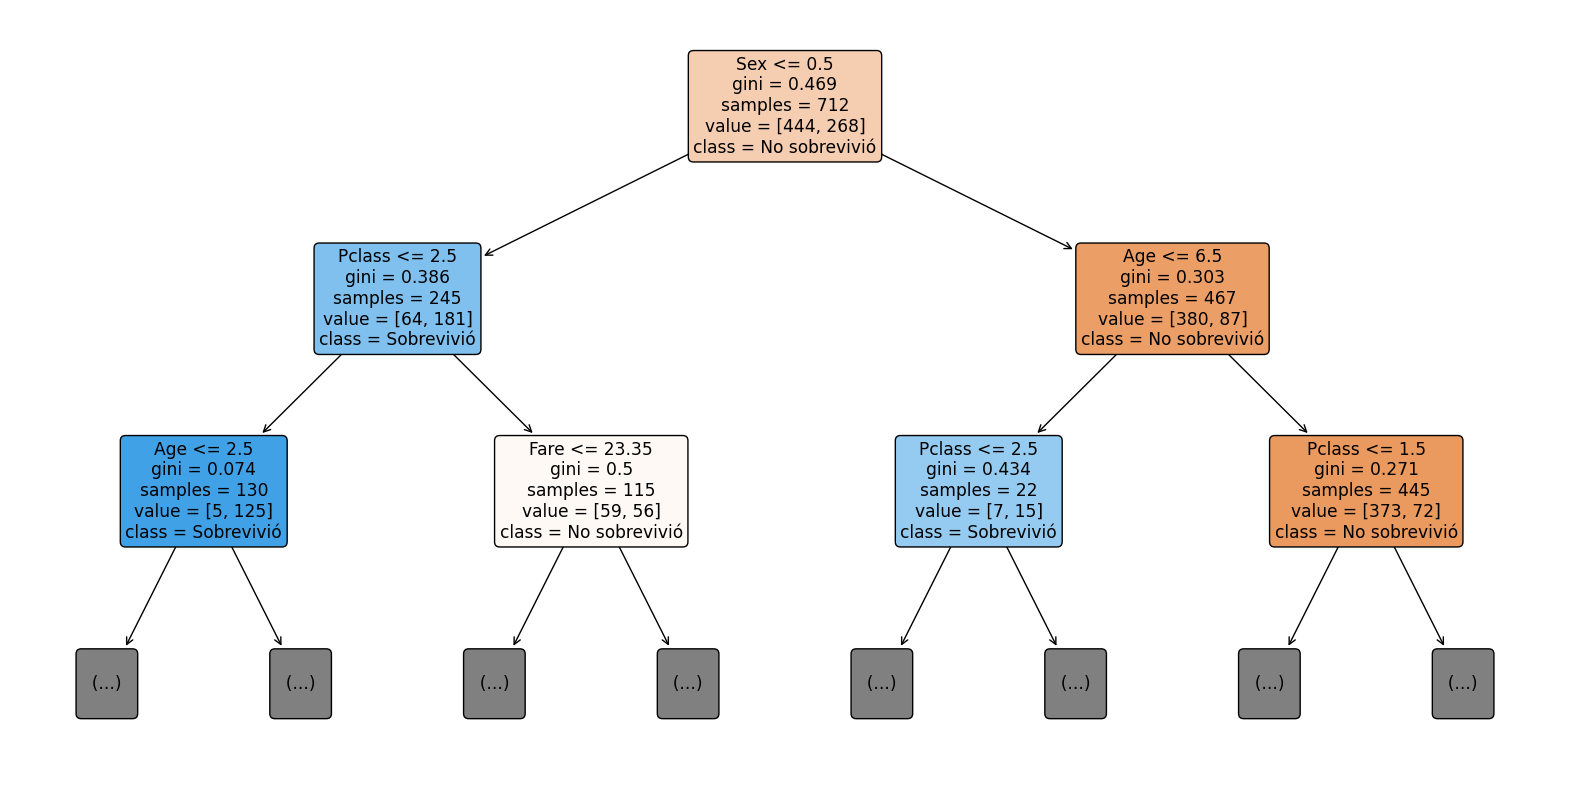

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  
plot_tree(DTC, filled=True, feature_names=list(X.columns), class_names=categorias, max_depth=2, impurity = True, rounded = True)  # 'X' son tus datos de características
plt.show()

### 3.2 Construir el modelo predictivo (Logistic Classifier)

In [50]:
from sklearn.linear_model import LogisticRegression

In [57]:
# Seleccionar las características relevantes
features = ['Pclass', 'Sex', 'Age', 'is_alone', 'Fare']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Survived'].astype('int32')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Calcular las predicciones en los datos de prueba
predictions = logreg.predict(X_test)

print("Accuracy Index: El", round(accuracy_score(y_test, predictions)*100), "% del total de valores fueron clasificados correctamente por el modelo.")   
print("Recall index: El ",round(recall_score(y_test, predictions)*100), "% de los pasajeros que sobrevivieron fueron identificados correctamente")  
print("Precision index:",  round(precision_score(y_test, predictions)*100),"% de los pasajeros que sobrevivieron no fueron clasificados como falsos positivos")  
print("F1 score:", round(f1_score(y_test, predictions)*100), "%")

Accuracy Index: El 80 % del total de valores fueron clasificados correctamente por el modelo.
Recall index: El  72 % de los pasajeros que sobrevivieron fueron identificados correctamente
Precision index: 79 % de los pasajeros que sobrevivieron no fueron clasificados como falsos positivos
F1 score: 75 %


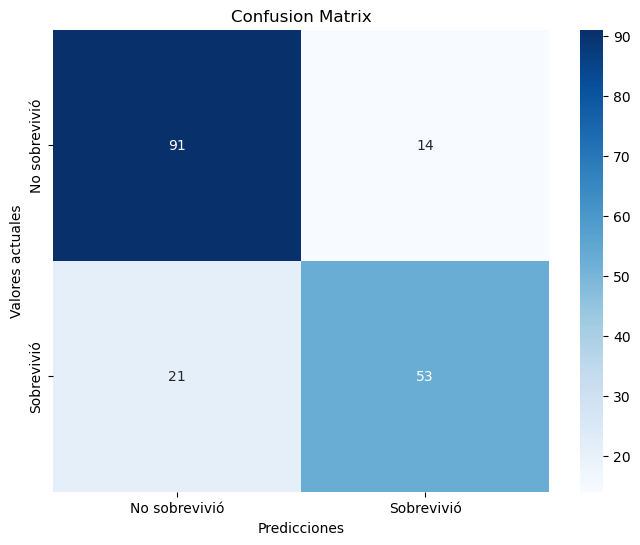

In [58]:
mc=confusion_matrix(y_test, predictions)

categorias = ['No sobrevivió','Sobrevivió' ]

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(mc, annot=True, cmap='Blues', xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicciones')
plt.ylabel('Valores actuales')
plt.title('Confusion Matrix')
plt.show()